In [54]:
# Installing required packages
!pip install -U matplotlib bioinfokit yellowbrick statsmodels

In [55]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter

# Loading the dataset
df = pd.read_csv("/content/mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [56]:
# Checking the shape of the dataset
print("Dataset Shape:", df.shape)

# Checking data types and missing values
print("\nData Types and Missing Values:")
print(df.info())

# Value counts for categorical variables
print("\nValue Counts for Categorical Variables:")
print(df['Like'].value_counts())
print(df['Age'].value_counts())
print(df['VisitFrequency'].value_counts())
print(df['Gender'].value_counts())


Dataset Shape: (1453, 15)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None

Value Counts for Categorical

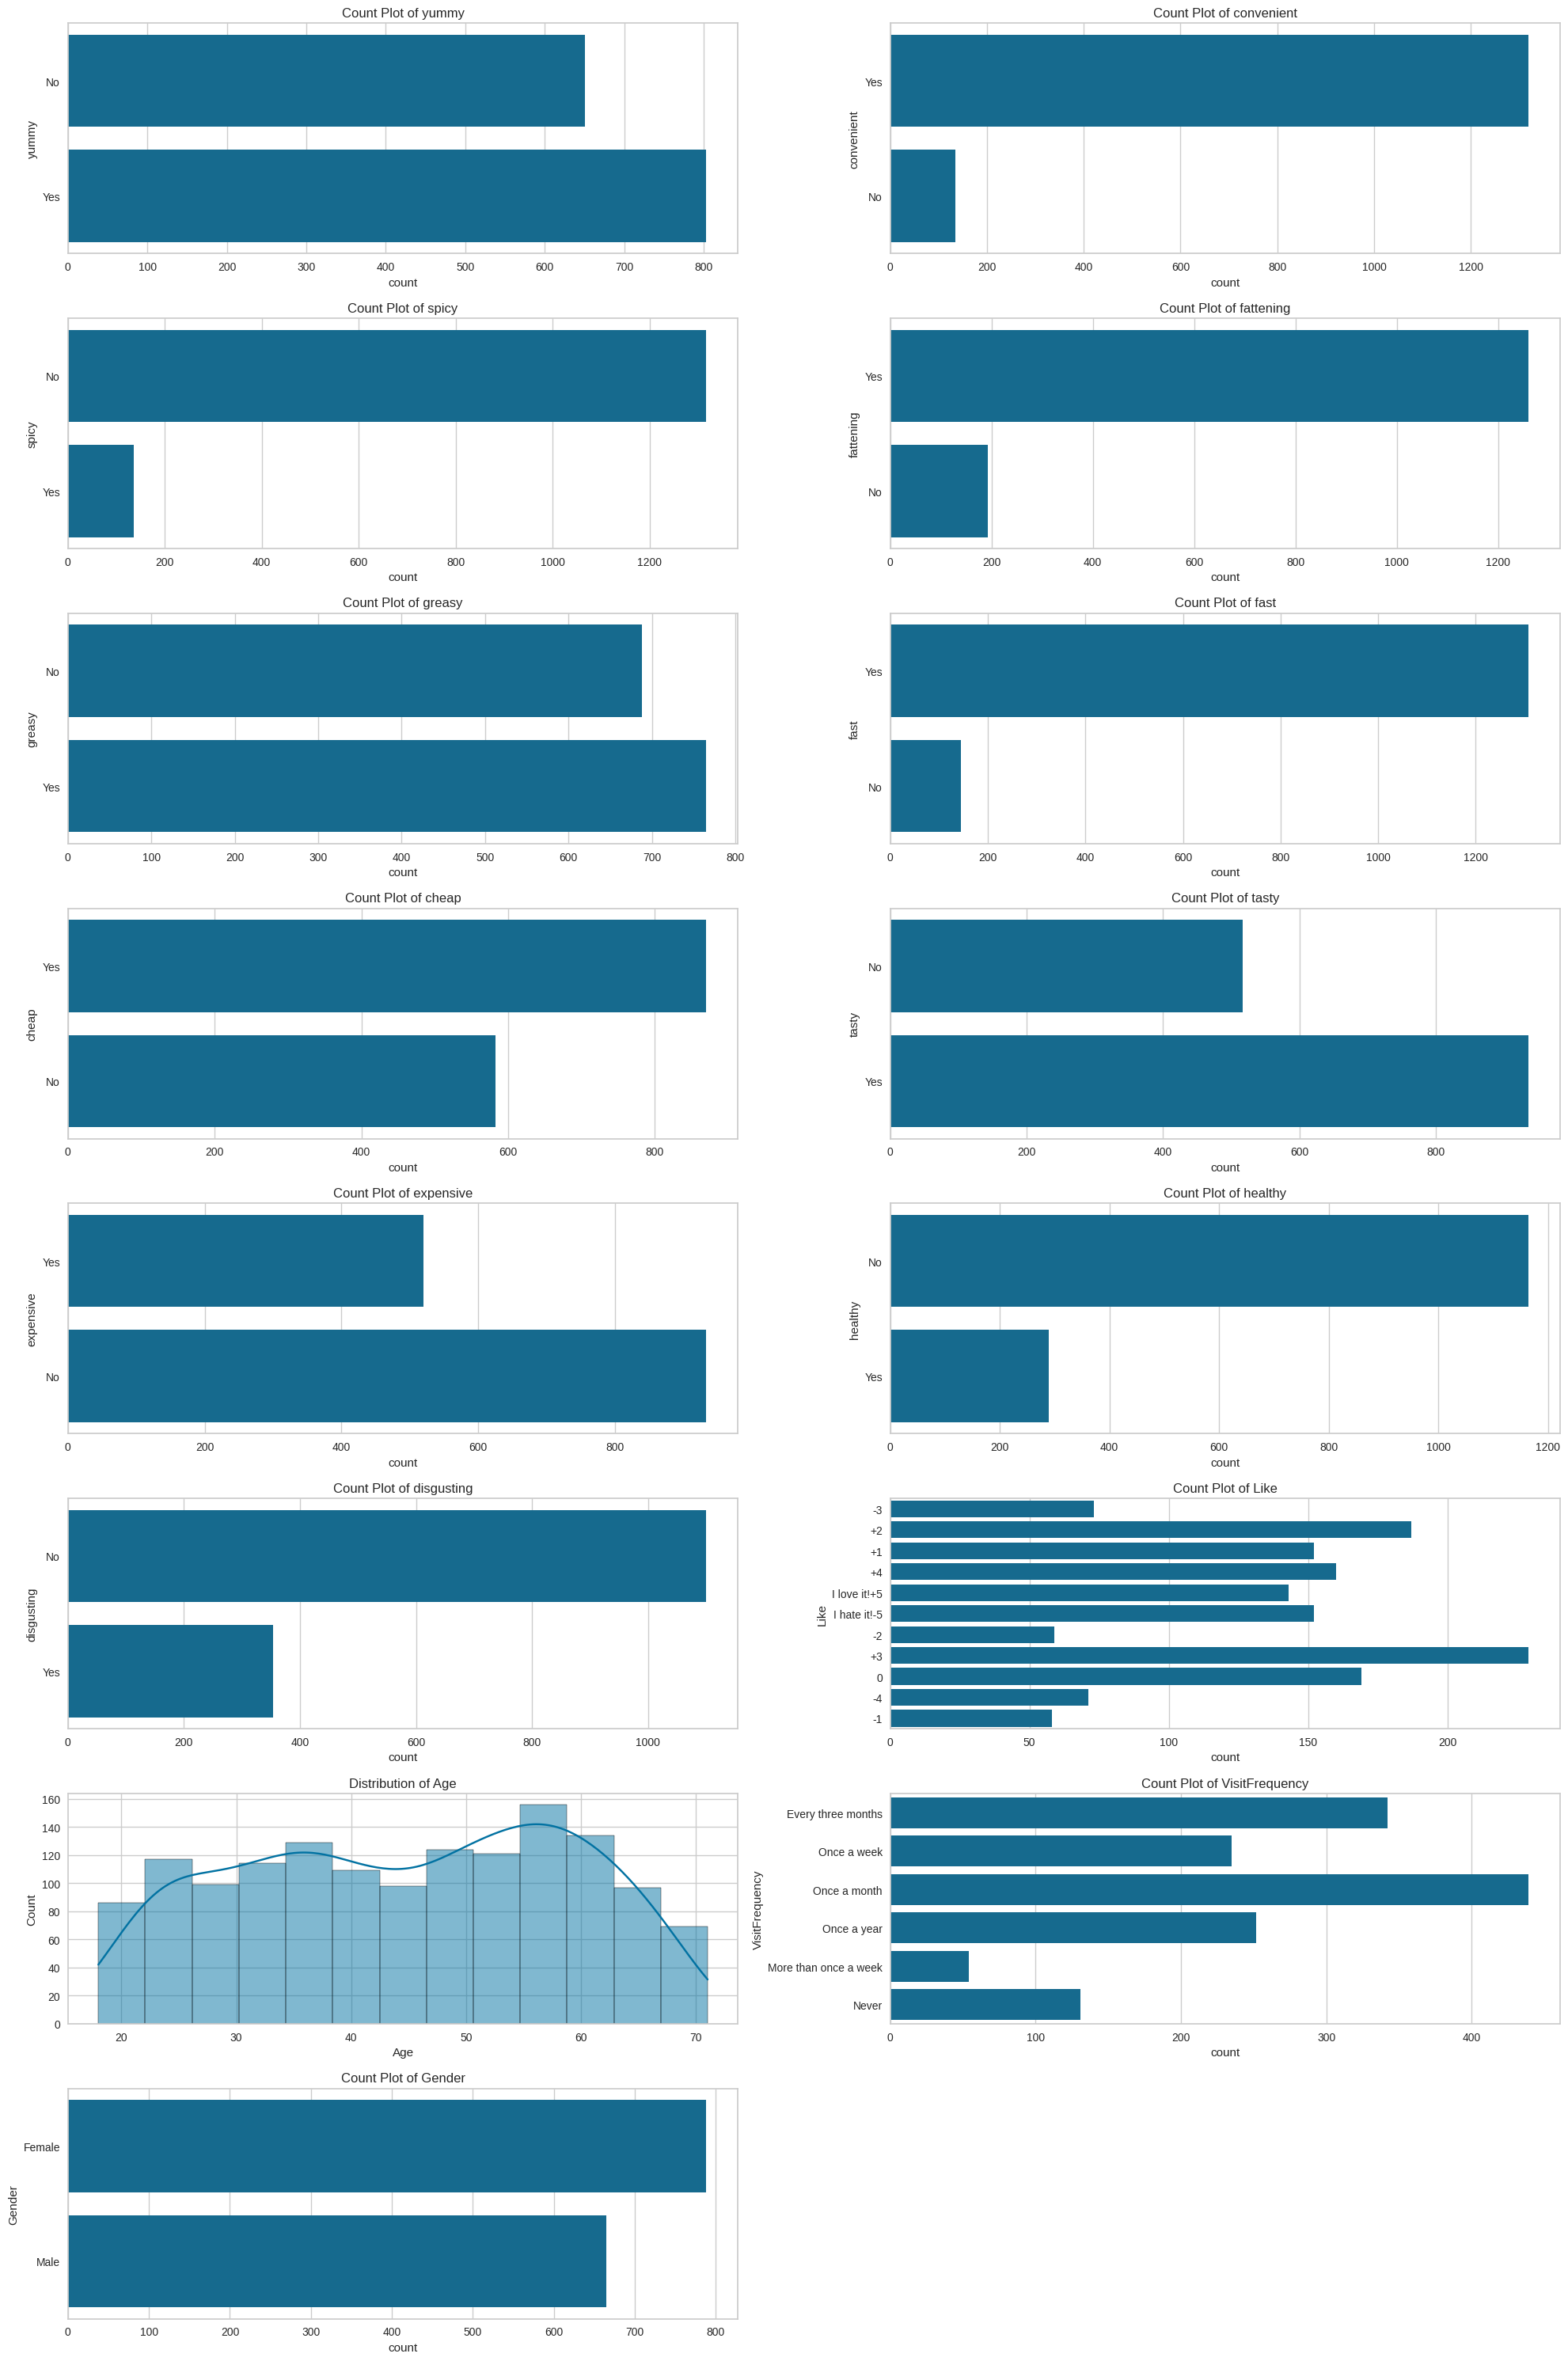

In [57]:
def EDA(df, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1]+1)/2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if df[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x += 1
            sns.countplot(df[i])
            plt.title(f'Count Plot of {i}')
        else:
            con.append(i)
            plt.subplot(u, 2, x)
            x += 1
            sns.histplot(df[i], kde=True)
            plt.title(f'Distribution of {i}')

    plt.tight_layout()
    plt.show()

# Applying the function to the dataset
EDA(df, (20, 30))


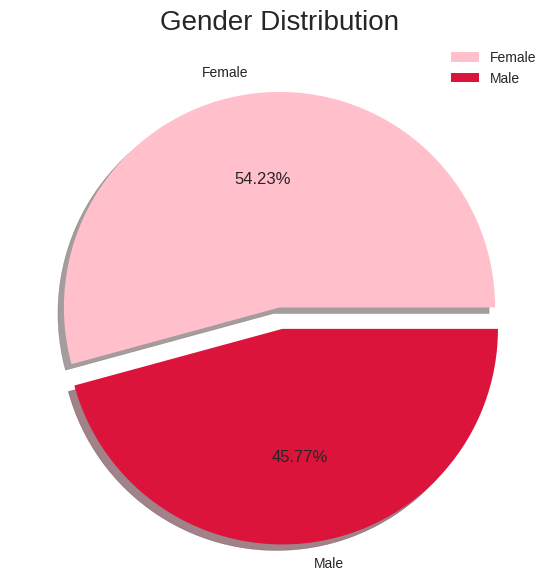

In [58]:
# Plotting the distribution of gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.figure(figsize=(7, 7))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Gender Distribution', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()


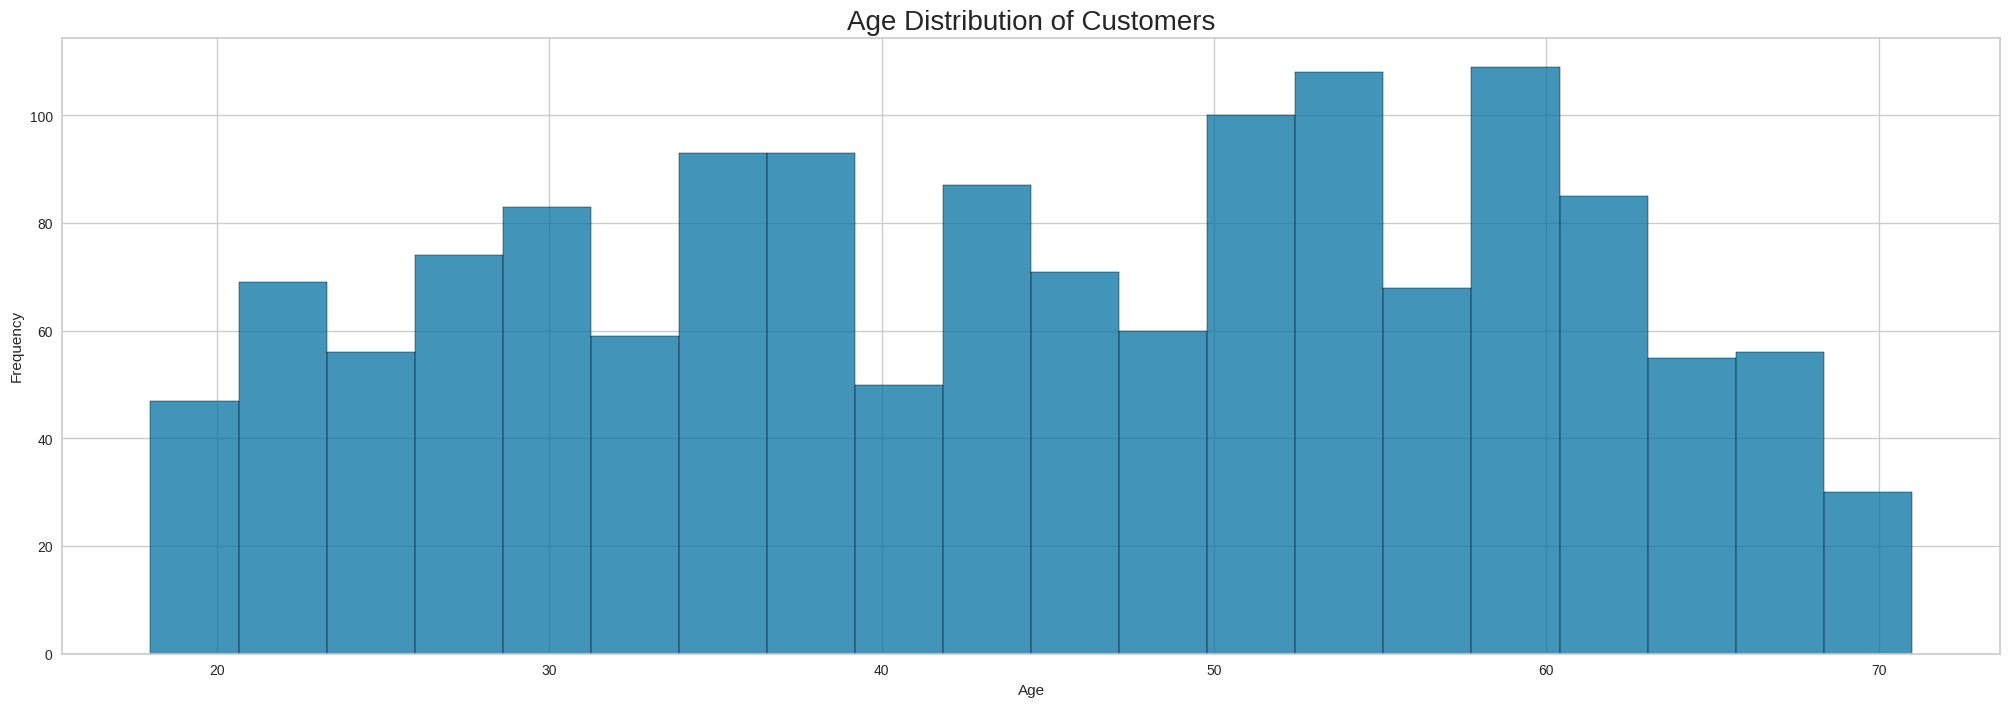

In [59]:
# Plotting the distribution of age
plt.figure(figsize=(25, 8))
sns.histplot(df['Age'], bins=20, kde=False, palette='viridis')
plt.title('Age Distribution of Customers', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


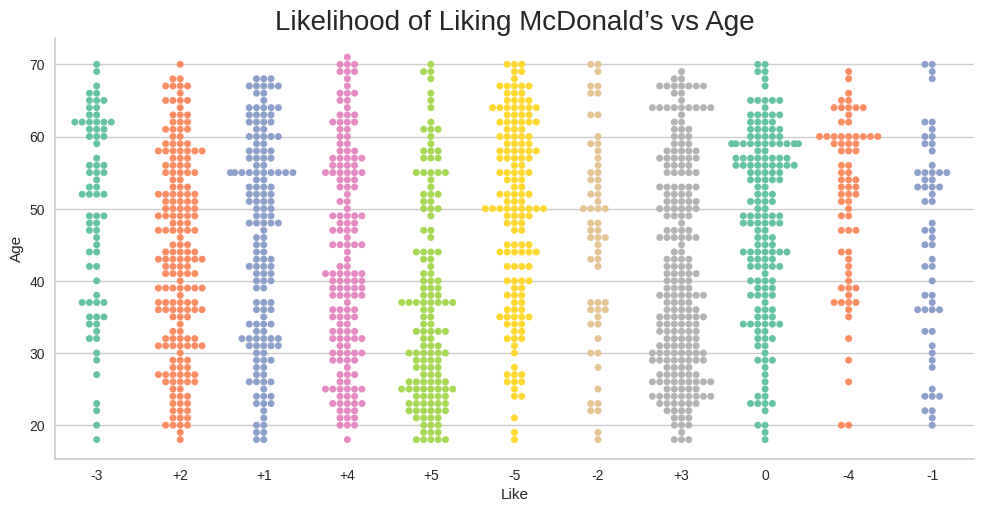

In [60]:
# Renaming 'Like' categories for convenience
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

# Plotting 'Like' vs 'Age'
sns.catplot(data=df, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2", kind="swarm")
plt.title('Likelihood of Liking McDonald’s vs Age', fontsize=20)
plt.xlabel('Like')
plt.ylabel('Age')
plt.show()


In [61]:
# Dropping non-binary columns for encoding
df_new = df.drop(labels=['Like', 'Age', 'VisitFrequency', 'Gender'], axis=1)

# Label Encoding binary features
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [62]:
# Scaling data before PCA
pca_data = preprocessing.scale(df_encoded)

# Applying PCA
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)

# Creating a DataFrame for principal components
names = [f'pc{i+1}' for i in range(11)]
pf = pd.DataFrame(data=pc, columns=names)
pf.head()

# Variance explained by each component
print("\nExplained Variance Ratio by Components:")
print(pca.explained_variance_ratio_)

# Component loadings
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=names, index=df_encoded.columns)
print("\nComponent Loadings:")
print(loadings_df)



Explained Variance Ratio by Components:
[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]

Component Loadings:
                 pc1       pc2       pc3       pc4       pc5       pc6  \
yummy      -0.406955  0.282615 -0.259588  0.026237  0.346857 -0.124916   
convenient -0.308827 -0.045682 -0.317151 -0.009424 -0.437148  0.188966   
spicy      -0.023320  0.069982  0.020170  0.845496 -0.185551  0.438661   
fattening   0.177861 -0.205590 -0.608077 -0.023396  0.086934  0.107520   
greasy      0.267796 -0.136300 -0.389568  0.330854  0.343713 -0.278329   
fast       -0.213039 -0.282441 -0.211395  0.090363 -0.568939 -0.572734   
cheap      -0.289134 -0.575032  0.125157  0.114477  0.256981  0.020657   
tasty      -0.426115  0.242199 -0.269648  0.072691  0.286099 -0.053053   
expensive   0.290944  0.567528 -0.183298  0.035510 -0.207362 -0.171160   
healthy    -0.266839  0.201031  0.367814  0.301990  0.051787 -0.446166   


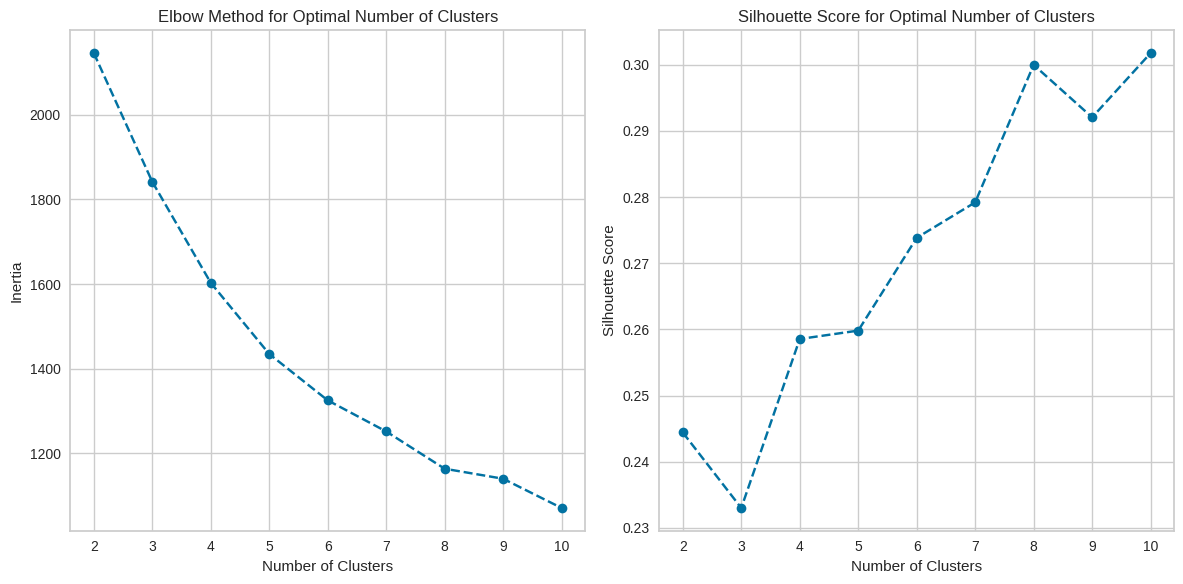

In [63]:
# Define the range of clusters to test
cluster_range = range(2, 11)  # Start from 2 as silhouette score is not defined for 1 cluster

# Elbow Method
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')

# Silhouette Score
silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(df_encoded)
    score = silhouette_score(df_encoded, clusters)
    silhouette_scores.append(score)

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')

plt.tight_layout()
plt.show()

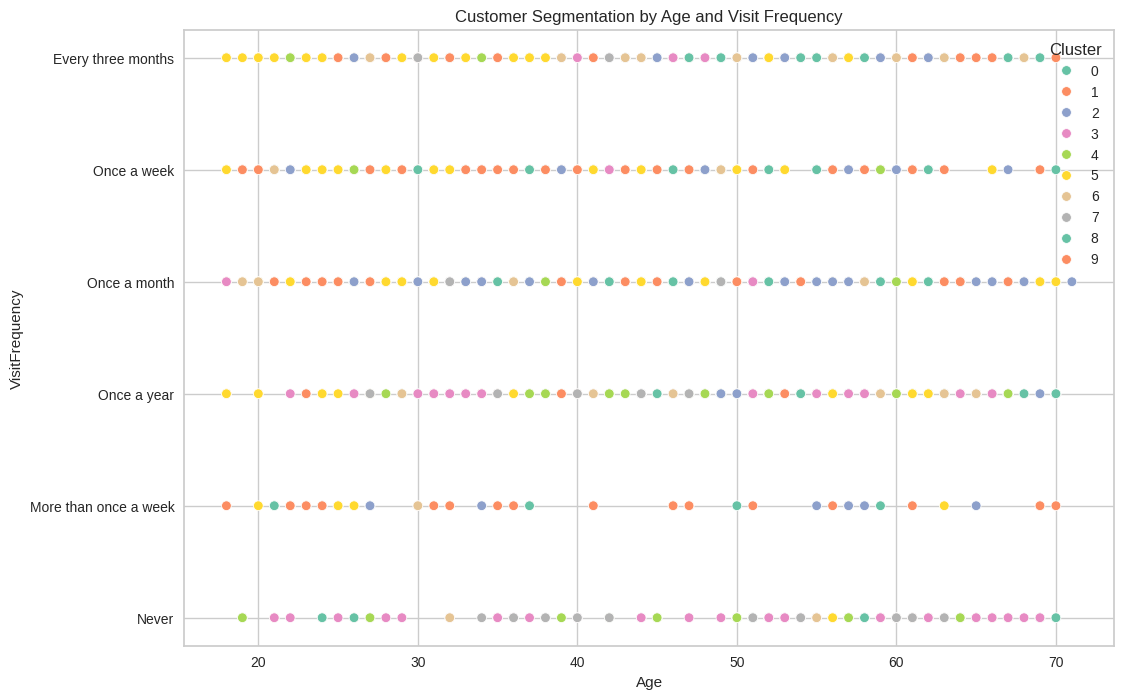

In [64]:
# Choose the optimal number of clusters based on silhouette scores
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(df_encoded)
df['Cluster'] = clusters


# Plotting clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='VisitFrequency', hue='Cluster', palette='Set2', marker='o')
plt.title('Customer Segmentation by Age and Visit Frequency')
plt.show()

In [65]:
# Analyzing the characteristics of each cluster
print("\nCluster Characteristics:")
for cluster_num in df['Cluster'].unique():
    print(f"\nCluster {cluster_num}:")
    print(df[df['Cluster'] == cluster_num].describe())



Cluster Characteristics:

Cluster 6:
              Age  Cluster
count  129.000000    129.0
mean    49.899225      6.0
std     13.416900      0.0
min     19.000000      6.0
25%     42.000000      6.0
50%     53.000000      6.0
75%     61.000000      6.0
max     70.000000      6.0

Cluster 1:
              Age  Cluster
count  167.000000    167.0
mean    36.455090      1.0
std     12.267946      0.0
min     18.000000      1.0
25%     26.000000      1.0
50%     34.000000      1.0
75%     45.000000      1.0
max     67.000000      1.0

Cluster 5:
              Age  Cluster
count  255.000000    255.0
mean    37.674510      5.0
std     15.098102      0.0
min     18.000000      5.0
25%     25.000000      5.0
50%     33.000000      5.0
75%     52.000000      5.0
max     70.000000      5.0

Cluster 2:
              Age  Cluster
count  222.000000    222.0
mean    46.238739      2.0
std     13.449141      0.0
min     21.000000      2.0
25%     35.250000      2.0
50%     48.000000      2.0
75%     

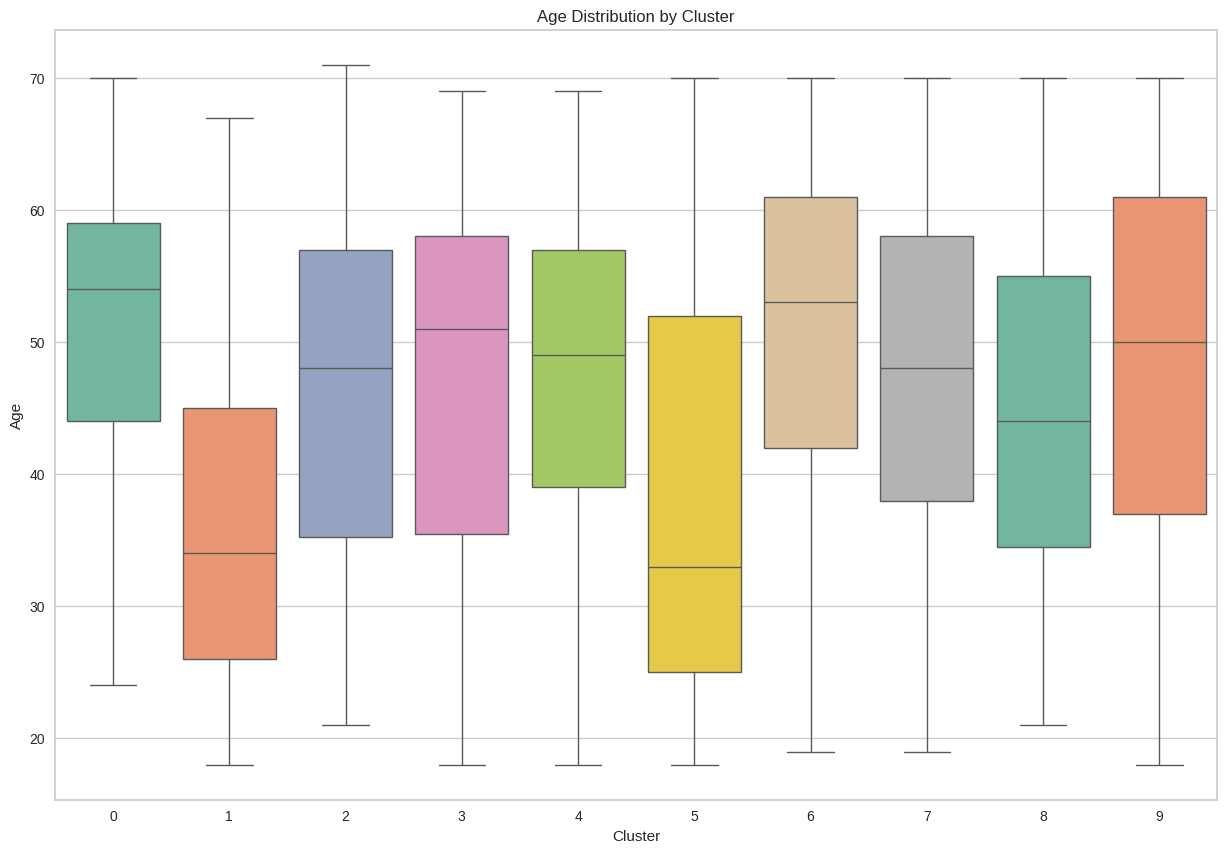

In [66]:
# Plotting the characteristics of each cluster
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='Cluster', y='Age', palette='Set2')
plt.title('Age Distribution by Cluster')
plt.show()
